In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from SGHMC.sghmc import sghmc

In [3]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df = df[['temp', 'RH', 'wind', 'area']]
df.head()

,temp,RH,wind,area
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.0
4,11.4,99,1.8,0.0


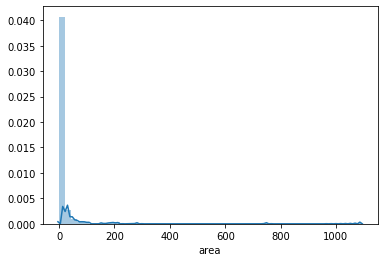

In [8]:
sns.distplot(df['area'])
pass

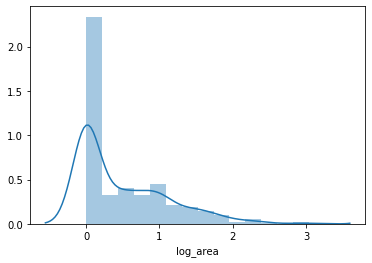

In [7]:
df['log_area'] = np.log10(df['area'] + 1)
sns.distplot(df['log_area'])
pass

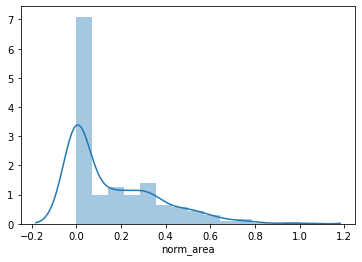

In [8]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

df['norm_area'] = normalize(df.log_area)
sns.distplot(df.norm_area)
pass

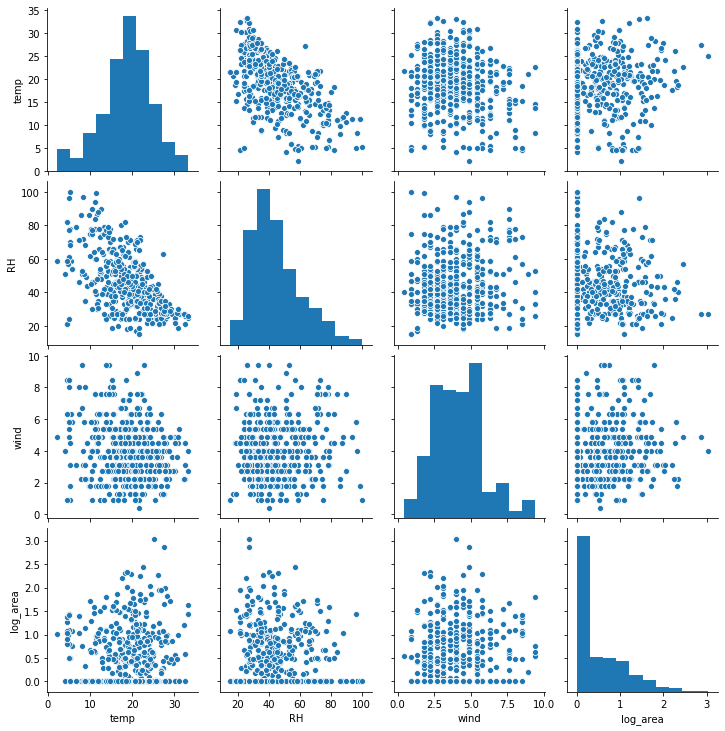

In [9]:
df2 = df[['temp', 'RH', 'wind', 'log_area']]
sns.pairplot(df2)
pass

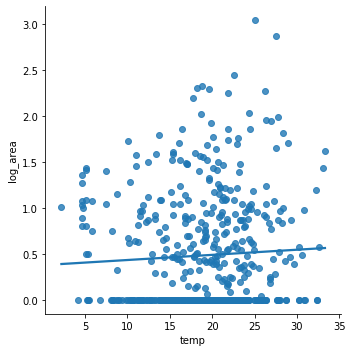

In [10]:
sns.lmplot(x = 'temp', y = 'log_area', data = df2, ci = None)
pass

In [11]:
np.random.seed(663)
df3 = np.c_[df2['temp'], df2['log_area']]
v = np.linalg.inv(np.eye(517))
n = len(df3)
theta_0 = np.array([3, 3])
p = theta_0.shape[0]
eps = 0.1
C = np.eye(2)
V_hat = np.eye(2)*4
batch_size = 5
n_iter = 5000
inv_M = np.eye(p)
burn_in = 200

def gradU(theta, data, n, batch_size):
    '''noisy gradient from paper fig1'''
    x = np.c_[np.ones(batch_size), data[:,0]]
    y = data[:,1][:,None]
    return np.c_[-1/1.5*np.sum(y-theta[0]+theta[1]*x),-1/1.5*np.sum((y-theta[0]+theta[1]*x)*x)]-theta

sim_real = sghmc(gradU, eps, C, inv_M, theta_0, V_hat, df3, batch_size, burn_in, n_iter)

/Users/ali/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/ali/STA663-Final-Project-SGHMC/SGHMC/sghmc.py:67: RuntimeWarning: invalid value encountered in matmul
  theta = theta + (eps*inv_M@momen).flatten()
/Users/ali/STA663-Final-Project-SGHMC/SGHMC/sghmc.py:69: RuntimeWarning: invalid value encountered in matmul
  momen = momen - eps*gradU_batch - eps*C@inv_M@momen + Sigma@np.random.randn(p).reshape(p, -1)


In [12]:
sim_real

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])